<a href="https://colab.research.google.com/github/PanavShah1/Summer_of_Quant/blob/main/Moving_Average_Crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pip install yfinance
import yfinance as yf

In [78]:
company_ticker = "AAPL"

In [79]:
ticker = yf.Ticker(company_ticker)
hist = pd.DataFrame(ticker.history(period="max"))
hist.reset_index(inplace=True)
hist['Date'] = hist['Date'].dt.date
hist.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10970,2024-06-20,213.929993,214.240005,208.850006,209.679993,86172500,0.0,0.0
10971,2024-06-21,210.389999,211.889999,207.110001,207.490005,246421400,0.0,0.0
10972,2024-06-24,207.720001,212.699997,206.589996,208.139999,80727000,0.0,0.0
10973,2024-06-25,209.149994,211.380005,208.610001,209.070007,56713900,0.0,0.0
10974,2024-06-26,211.500000,214.860001,210.639999,213.250000,64292900,0.0,0.0


In [80]:
df = hist
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
10970,2024-06-20,213.929993,214.240005,208.850006,209.679993,86172500,0.0,0.0
10971,2024-06-21,210.389999,211.889999,207.110001,207.490005,246421400,0.0,0.0
10972,2024-06-24,207.720001,212.699997,206.589996,208.139999,80727000,0.0,0.0
10973,2024-06-25,209.149994,211.380005,208.610001,209.070007,56713900,0.0,0.0
10974,2024-06-26,211.500000,214.860001,210.639999,213.250000,64292900,0.0,0.0


In [81]:
df = df[['Date', 'Close']]
df.tail()

,Date,Close
10970,2024-06-20,209.679993
10971,2024-06-21,207.490005
10972,2024-06-24,208.139999
10973,2024-06-25,209.070007
10974,2024-06-26,213.250000


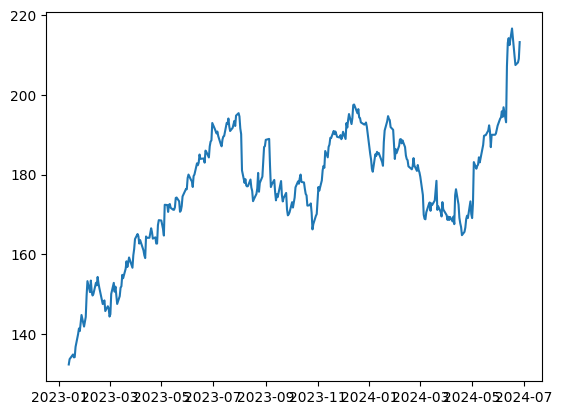

In [82]:
plt.plot(df['Date'][-365:], df['Close'][-365:])

In [83]:
smoothening = 20
days_1 = 50
days_2 = 100

In [84]:
def ema(close_values: list, days: int, smoothening: int):
  factor = smoothening / (days + 1)
  ema_values = []
  for i, close in enumerate(close_values):
    if i < days:
      ema_values.append(sum(close_values[: i+1]))
    else:
      ema_values.append(close_values[i] * factor + ema_values[i-1] * (1 - factor))
  return ema_values


In [85]:
ema_1 = ema(df['Close'], days_1, smoothening)
ema_1[-10:]

[204.78108474986922,
 208.49046543351426,
 210.0589125157299,
 212.651495124834,
 213.29404342338256,
 211.87676862040166,
 210.15646935481828,
 209.36569681945758,
 209.24974015465804,
 210.81846950577255]

In [86]:
ema_2 = ema(df['Close'], days_2, smoothening)
ema_2[-10:]

[199.56133632421694,
 202.4680034863847,
 204.45255833921232,
 206.87185335500104,
 208.34079195522517,
 208.60598021672143,
 208.3849951229477,
 208.3364811163538,
 208.4817338307825,
 209.42594495339983]

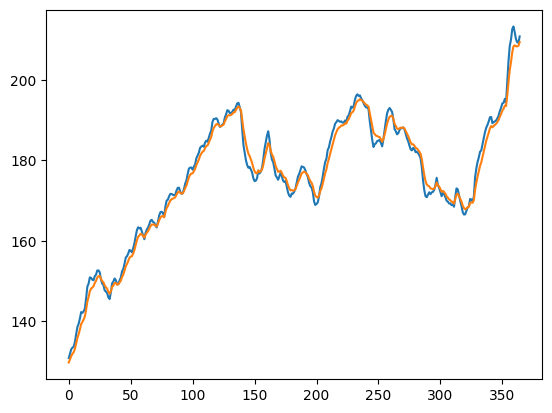

In [87]:
plt.plot(ema_1[-365:])
plt.plot(ema_2[-365:])

In [88]:
df['EMA_1'] = ema_1
df['EMA_2'] = ema_2
df.tail()

<ipython-input-88-0d50902bdc39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA_1'] = ema_1
<ipython-input-88-0d50902bdc39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA_2'] = ema_2


,Date,Close,EMA_1,EMA_2
10970,2024-06-20,209.679993,211.876769,208.605980
10971,2024-06-21,207.490005,210.156469,208.384995
10972,2024-06-24,208.139999,209.365697,208.336481
10973,2024-06-25,209.070007,209.249740,208.481734
10974,2024-06-26,213.250000,210.818470,209.425945


In [89]:
len(df)

10975

----- 1 -----
Buy on 2023-01-12 for 132.320
Sell on 2023-02-21 for 147.492
Profit : 15.172

----- 2 -----
Buy on 2023-03-06 for 152.806
Sell on 2023-04-12 for 159.034
Profit : 6.228

----- 3 -----
Buy on 2023-04-13 for 164.458
Sell on 2023-04-25 for 162.680
Profit : -1.778

----- 4 -----
Buy on 2023-04-27 for 167.289
Sell on 2023-05-24 for 170.932
Profit : 3.643

----- 5 -----
Buy on 2023-05-25 for 172.076
Sell on 2023-07-11 for 187.086
Profit : 15.010

----- 6 -----
Buy on 2023-07-13 for 189.533
Sell on 2023-08-03 for 190.160
Profit : 0.627

----- 7 -----
Buy on 2023-08-28 for 179.480
Sell on 2023-09-07 for 176.861
Profit : -2.620

----- 8 -----
Buy on 2023-10-05 for 174.221
Sell on 2023-10-18 for 175.147
Profit : 0.926

----- 9 -----
Buy on 2023-11-02 for 176.870
Sell on 2023-12-22 for 193.091
Profit : 16.221

----- 10 -----
Buy on 2024-01-19 for 191.057
Sell on 2024-01-30 for 187.546
Profit : -3.511

----- 11 -----
Buy on 2024-02-09 for 188.594
Sell on 2024-02-12 for 186.896
Profit 

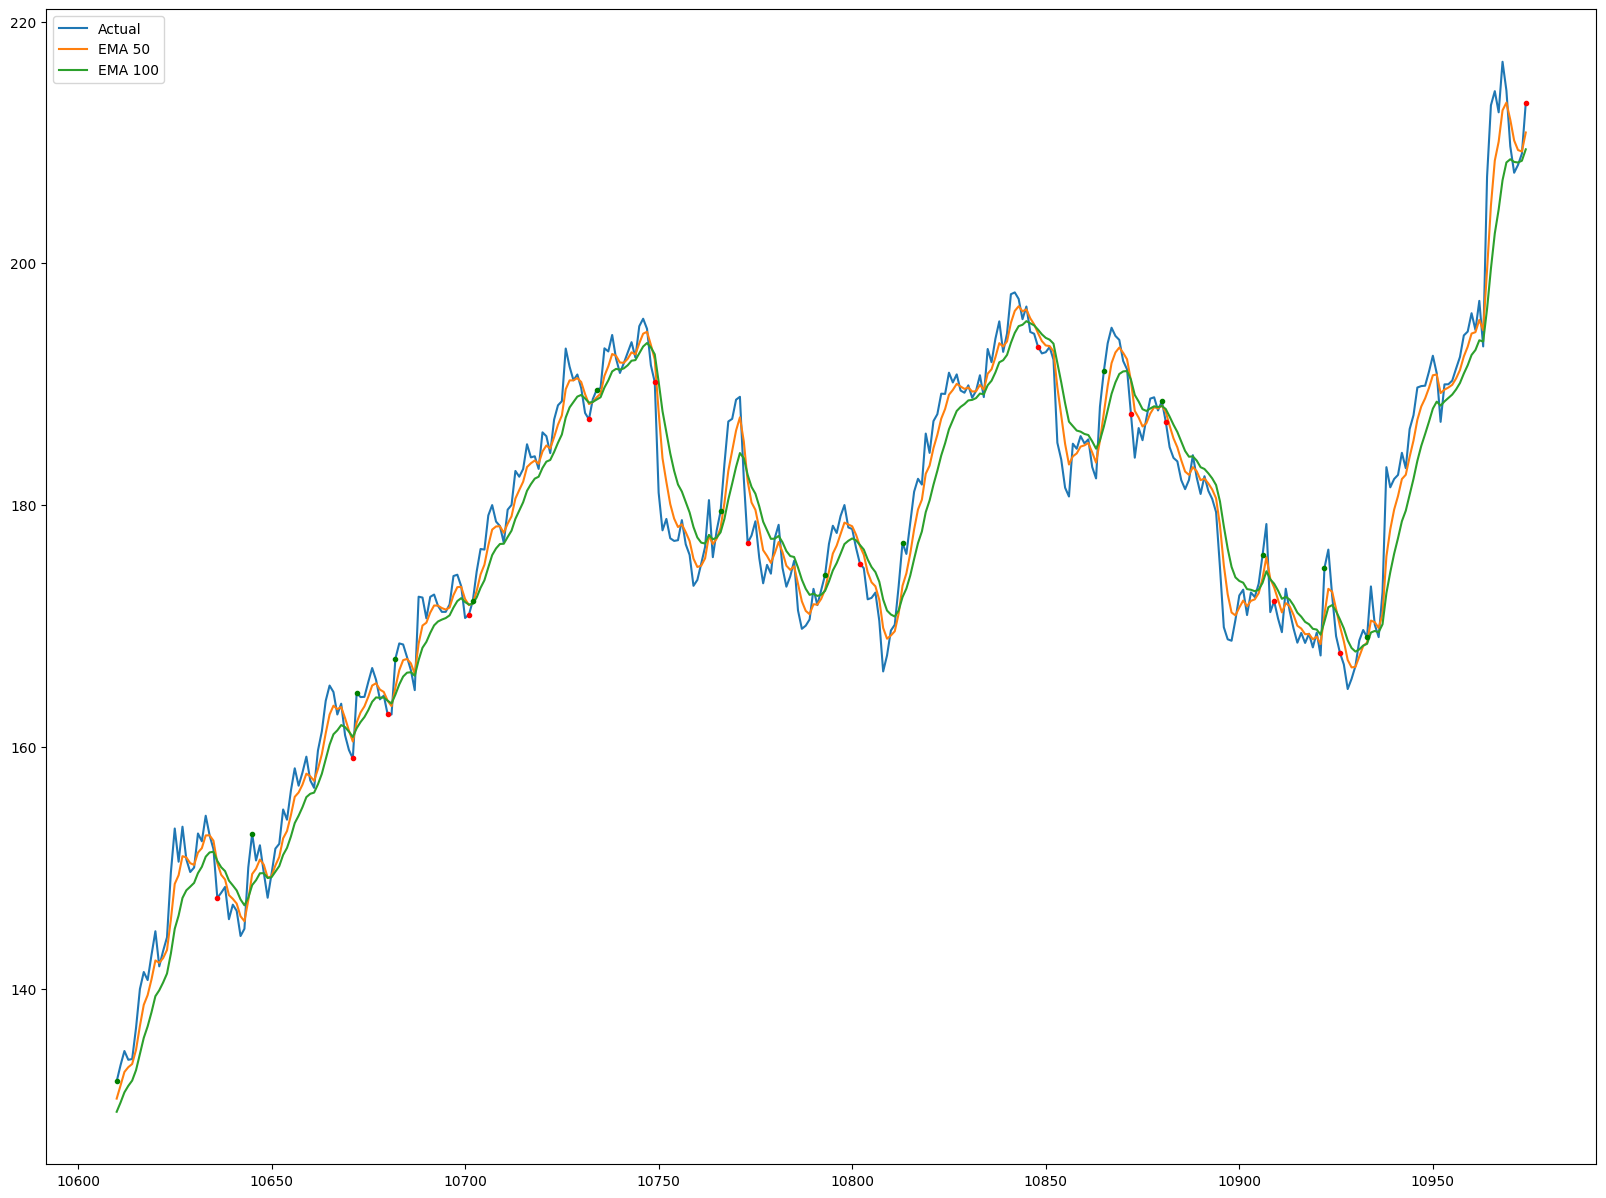

In [90]:
date_number = len(df) - 365

fig = plt.figure(figsize=(20, 15))
plt.plot(df['Close'][date_number:], label="Actual")
plt.plot(df['EMA_1'][date_number:], label=f"EMA {days_1}")
plt.plot(df['EMA_2'][date_number:], label=f"EMA {days_2}")
plt.legend()

net_profit = 0
buy = False
buy_date = None
ctr = 1
for i in range(date_number, len(df)):
  if df['EMA_1'][i] > df['EMA_2'][i] and buy:
    pass
  elif df['EMA_1'][i] < df['EMA_2'][i] and buy:
    profit = df['Close'][i] - df['Close'][buy_date]
    net_profit += profit
    buy = False
    buy_date = None
    ctr+=1
    print(f"Sell on {df['Date'][i]} for {df['Close'][i]:.3f}")
    print(f"Profit : {profit:.3f}")
    print()
    plt.plot(i, df['Close'][i], '.', c='r')
  elif df['EMA_1'][i] > df['EMA_2'][i] and not buy:
    buy = True
    buy_date = i
    print(f"----- {ctr} -----")
    print(f"Buy on {df['Date'][i]} for {df['Close'][i]:.3f}")
    plt.plot(i, df['Close'][i], '.', c='g')
  elif df['EMA_1'][i] < df['EMA_2'][i] and not buy:
    pass
  else:
    pass

if buy == True:
  profit = df['Close'][len(df) - 1] - df['Close'][buy_date]
  print(f"Sell on {df['Date'][len(df) - 1]} for {df['Close'][len(df) - 1]:.3f}")
  print(f"Profit : {profit:.3f}")
  net_profit += profit
  buy = False
  buy_date = None
  ctr+=1
  plt.plot(i, df['Close'][len(df) - 1], '.', c='r')

print()
print("--------------")
print(f"Total profit : {net_profit:.3f}")
print(f"Profit % : {(net_profit / df['Close'][date_number] * 100):.3f} %")